In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
get_ipython().magic(u'matplotlib inline')
import sklearn



In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
print(train.shape)
train.head(2)
    


# In[5]:

full_data=[train,test]


# In[6]:

for data in full_data:
    data['date']=data['datetime'].apply(lambda x: x.split()[0])
    data['hour']=data['datetime'].apply(lambda x: x.split()[1].split(':')[0])


# In[7]:

train.head(2)


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01


In [4]:
for data in full_data:
    data['year']=data['date'].apply(lambda x:x.split('-')[0])
    data['month']=data['date'].apply(lambda x:x.split('-')[1])
    data['day']=data['date'].apply(lambda x:x.split('-')[2])

In [5]:
del train['datetime']
del test['datetime']
del train['date']
del test['date']


In [6]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,2011,01,01
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,2011,01,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,2011,01,01
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,2011,01,01
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,2011,01,01


In [7]:
for col in ['season','holiday','workingday','weather','hour','year','day','month','weekend']:
    train[col]=train[col].astype('category')
    test[col]=test[col].astype('category')


# In[14]:

plt.figure(figsize=(10,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train,x='year',y='count')


# In[15]:

print(sn.boxplot(data=train,x='weekend',y='casual'))
plt.show()


KeyError: 'weekend'

In [8]:
for col in ['season','holiday','workingday','weather','hour','year','day','month','weekend']:
    train[col]=train[col].astype('category')
    test[col]=test[col].astype('category')


KeyError: 'weekend'

In [9]:
for data in full_data:
    data['weekend']=0
for data in full_data:
    data.loc[(data.holiday==0) & (data.workingday==0),'weekend']=1 
    

In [10]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour          category
year          category
month         category
day           category
weekend          int64
dtype: object

In [11]:
for col in ['season','holiday','workingday','weather','hour','year','day','month','weekend']:
    train[col]=train[col].astype('category')
    test[col]=test[col].astype('category')

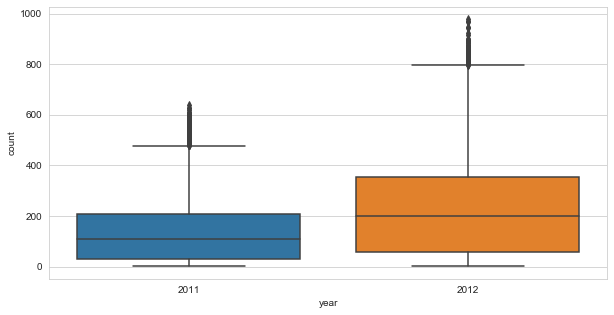

In [12]:
plt.figure(figsize=(10,5))
sn.set_style(style='whitegrid')
sn.boxplot(data=train,x='year',y='count')

AxesSubplot(0.125,0.125;0.775x0.755)


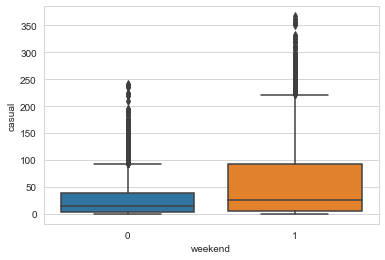

In [13]:
print(sn.boxplot(data=train,x='weekend',y='casual'))
plt.show()

C:\Users\prave\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x360 with 0 Axes>

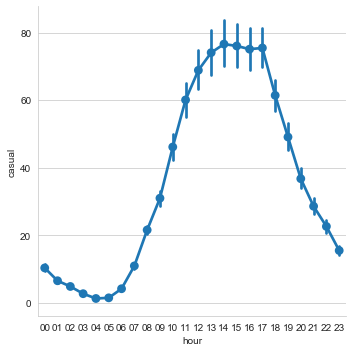

In [14]:
plt.figure(figsize=(10,5))
sn.factorplot(x='hour',y='casual',data=train)
plt.show()

<Figure size 720x360 with 0 Axes>

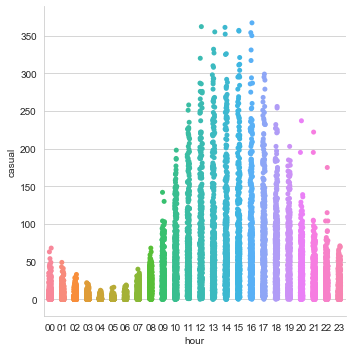

In [15]:
plt.figure(figsize=(10,5))
sn.catplot(x='hour',y='casual',data=train)
plt.show()

In [16]:
for data in full_data:
    data['hour']=data['hour'].astype('int64')
    data['hour_cs']=0
    data.loc[data['hour']<=7,'hour_cs']=1
    data.loc[(data['hour']>=8) & (data['hour']<=11),'hour_cs']=2
    data.loc[(data['hour']>=10) & (data['hour']<=17),'hour_cs']=3
    data.loc[(data['hour']>=18),'hour_cs']=2
    data['hour_cs']=data['hour_cs'].astype('category')

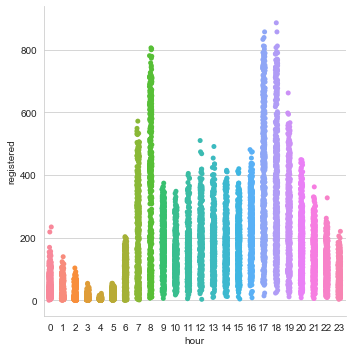

In [17]:
sn.catplot(x='hour',y='registered',data=train)

In [18]:
for data in full_data:
    data['hour']=data['hour'].astype('int64')
    data['hour_cs']=0
    data.loc[data['hour']<=7,'hour_cs']=1
    data.loc[(data['hour']>=8) & (data['hour']<=11),'hour_cs']=1
    data.loc[(data['hour']>=10) & (data['hour']<=17),'hour_cs']=1
    data.loc[(data['hour']>=18),'hour_cs']=1
    data['hour_cs']=data['hour_cs'].astype('category')

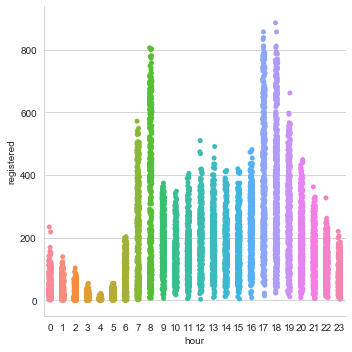

In [19]:
sn.catplot(x='hour',y='registered',data=train)

In [20]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekend,hour_cs
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,01,01,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,01,01,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,01,01,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,01,01,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,01,01,1,1


In [21]:
for data in full_data:
    data['hour']=data['hour'].astype('int64')
    data['hour_cs']=0
    data.loc[data['hour']<=7,'hour_cs']=1
    data.loc[(data['hour']>=8) & (data['hour']<=11),'hour_cs']=2
    data.loc[(data['hour']>=10) & (data['hour']<=17),'hour_cs']=3
    data.loc[(data['hour']>=18),'hour_cs']=2
    data['hour_cs']=data['hour_cs'].astype('category')

In [22]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekend,hour_cs
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,01,01,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,01,01,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,01,01,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,01,01,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,01,01,1,1


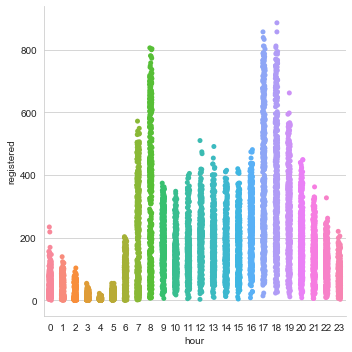

In [23]:
sn.catplot(x='hour',y='registered',data=train)

In [24]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekend,hour_cs
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,01,01,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,01,01,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,01,01,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,01,01,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,01,01,1,1


In [25]:
for data in full_data:
    data['hour']=data['hour'].astype('int64')
    data['hour_cs']=0
    data.loc[data['hour']<=7,'hour_cs']=1
    data.loc[(data['hour']>=8) & (data['hour']<=11),'hour_cs']=2
    data.loc[(data['hour']>=10) & (data['hour']<=17),'hour_cs']=3
    data.loc[(data['hour']>=18),'hour_cs']=2
    data['hour_cs']=data['hour_cs'].astype('category')

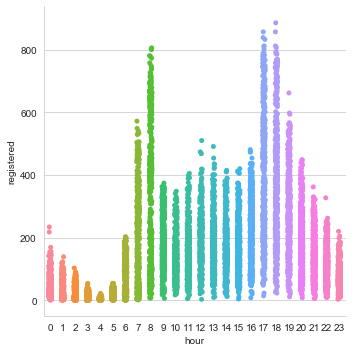

In [26]:
sn.catplot(x='hour',y='registered',data=train)

In [27]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,weekend,hour_cs
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,01,01,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,01,01,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,01,01,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,01,01,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,01,01,1,1


In [28]:
    data['hour_cr']=0
    data.loc[data['hour']<=6,'hour_cr']=1
    data.loc[(data['hour']>=7) & (data['hour']<=10),'hour_cr']=3
    data.loc[(data['hour']>=11) & (data['hour']<=16),'hour_cr']=2
    data.loc[(data['hour']>=17) & (data['hour']<=20),'hour_cr']=3
    data.loc[(data['hour']>=21),'hour_cr']=1
    data['hour_cr']=data['hour_cr'].astype('category')
    data['hour']=data['hour'].astype('category')

In [29]:
for data in full_data:
    data['hour_cr']=0
    data.loc[data['hour']<=6,'hour_cr']=1
    data.loc[(data['hour']>=7) & (data['hour']<=10),'hour_cr']=3
    data.loc[(data['hour']>=11) & (data['hour']<=16),'hour_cr']=2
    data.loc[(data['hour']>=17) & (data['hour']<=20),'hour_cr']=3
    data.loc[(data['hour']>=21),'hour_cr']=1
    data['hour_cr']=data['hour_cr'].astype('category')
    data['hour']=data['hour'].astype('category')

TypeError: Unordered Categoricals can only compare equality or not

In [30]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour          category
year          category
month         category
day           category
weekend       category
hour_cs       category
hour_cr       category
dtype: object

C:\Users\prave\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


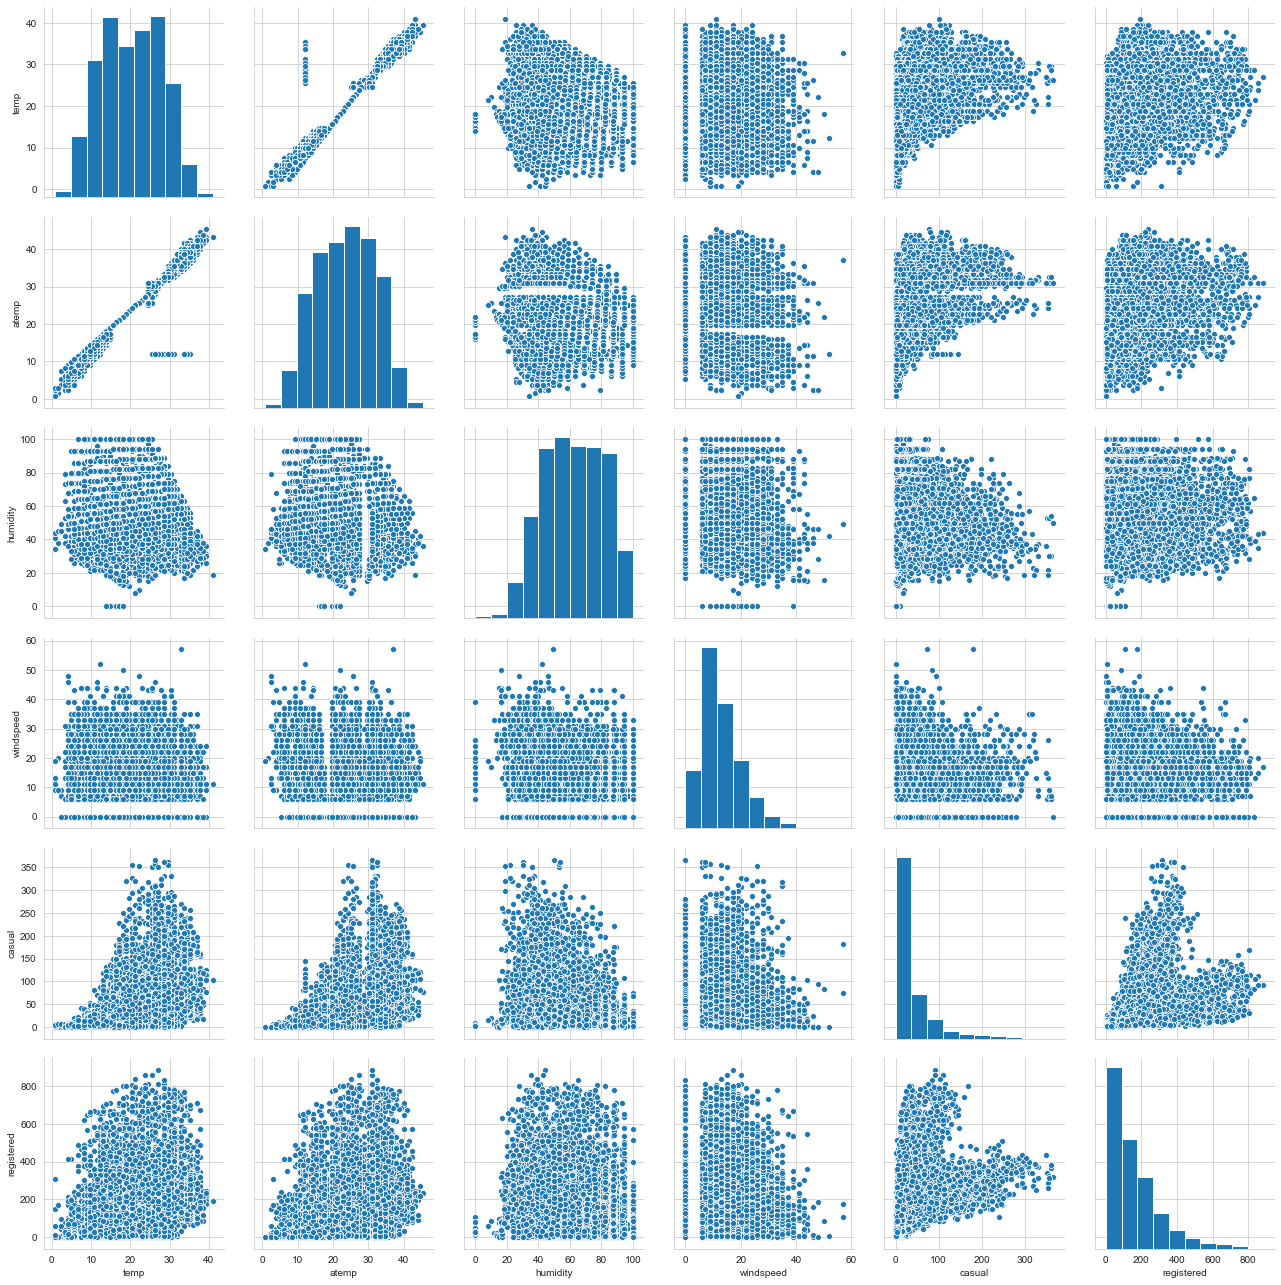

In [31]:
sn.pairplot(train[['temp','atemp','humidity','windspeed','casual','registered']],size=3)

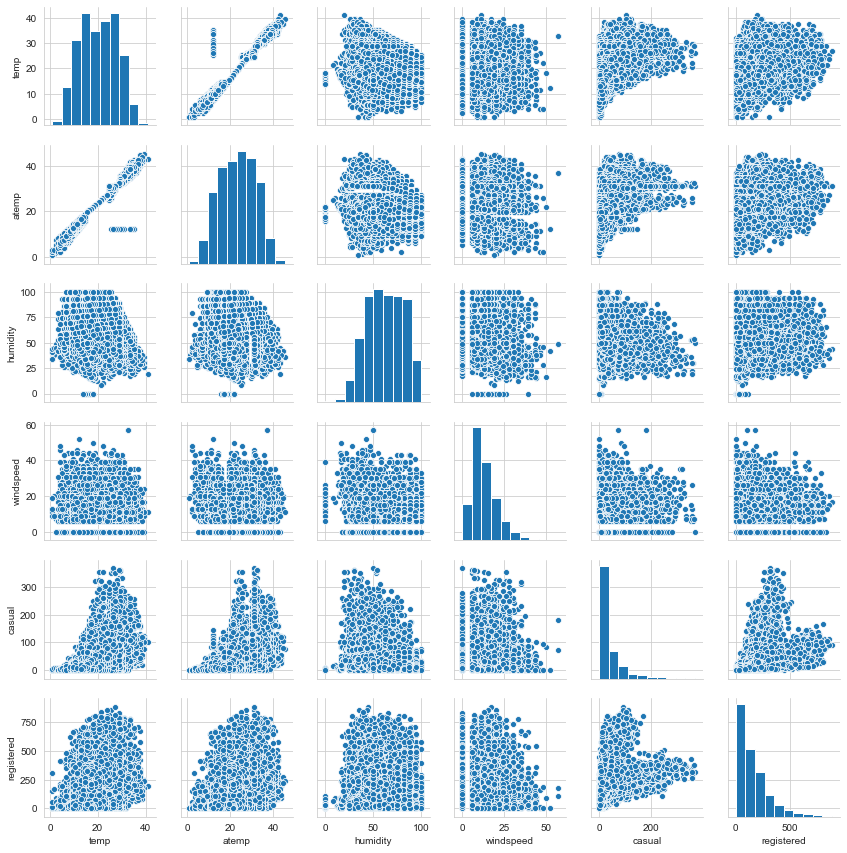

In [32]:
sn.pairplot(train[['temp','atemp','humidity','windspeed','casual','registered']],height=2)

In [33]:
for data in full_data:
    data.drop('atemp',axis=1,inplace=True)

In [34]:
train.shape

(10886, 17)

In [35]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'year', 'month',
       'day', 'weekend', 'hour_cs', 'hour_cr'],
      dtype='object')

In [36]:
features_cs=['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'hour', 'year','day','month', 'weekend', 'hour_cs']
features_cr=['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'hour', 'year','day','month', 'weekend', 'hour_cr']

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

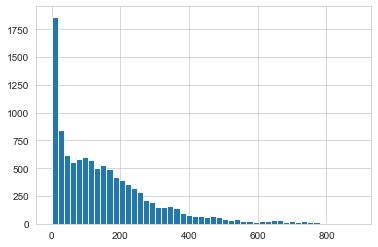

In [37]:
plt.hist(train.registered,bins=50)
plt.hist

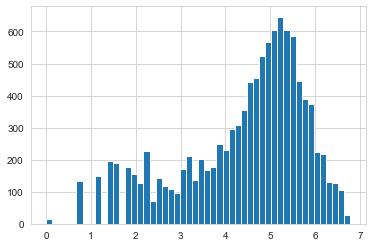

In [38]:
plt.hist(np.log(train.registered+1),bins=50)
plt.show()

In [39]:
def RMSLE(y,ypred):
    y=np.nan_to_num(y)
    ypred=np.nan_to_num(ypred)
    calc=(ypred-y)**2
    return np.sqrt(np.mean(calc))

In [40]:
train['target_cr']=np.log1p(train['registered']+1)
train['target_cs']=np.log1p(train['casual']+1)

In [41]:
scs_cs=StandardScaler()
scs_cr=StandardScaler()
train_cs_sd=scs_cs.fit_transform(train[features_cs].values)
train_cr_sd=scs_cr.fit_transform(train[features_cr].values)
test_cs_sd=scs_cs.transform(test[features_cs].values)
test_cr_sd=scs_cr.transform(test[features_cr].values)

NameError: name 'StandardScaler' is not defined

In [42]:
from sklearn.model_selection import train_test_split
xtrain_cs,xtest_cs,ytrain_cs,ytest_cs=train_test_split(train[features_cs].values,np.ravel(train['target_cs'].values),test_size=0.25)
xtrain_cr,xtest_cr,ytrain_cr,ytest_cr=train_test_split(train[features_cr].values,np.ravel(train['target_cr'].values),test_size=0.25)

In [43]:
print (xtrain_cs.shape)
print (xtest_cs.shape)

(8164, 13)
(2722, 13)


In [44]:
print (xtrain_cs.shape)
print (xtest_cs.shape)

(8164, 13)
(2722, 13)


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.preprocessing import StandardScaler
sc_1=StandardScaler()
sc_2=StandardScaler()
xtrain_cs_norm=sc_1.fit_transform(xtrain_cs)
xtest_cs_norm=sc_1.transform(xtest_cs)
xtrain_cr_norm=sc_2.fit_transform(xtrain_cr)
xtest_cr_norm=sc_2.transform(xtest_cr)

In [47]:
scs_cs=StandardScaler()
scs_cr=StandardScaler()
train_cs_sd=scs_cs.fit_transform(train[features_cs].values)
train_cr_sd=scs_cr.fit_transform(train[features_cr].values)
test_cs_sd=scs_cs.transform(test[features_cs].values)
test_cr_sd=scs_cr.transform(test[features_cr].values)

In [48]:
clf_final_cs=RandomForestRegressor(n_estimators=300,max_depth=10)
clf_final_cr=RandomForestRegressor(n_estimators=300,max_depth=10)
clf_final_cs.fit(train_cs_sd,train['target_cs'].values)
clf_final_cr.fit(train_cr_sd,train['target_cr'].values)
pred_cs=(np.exp(clf_final_cs.predict(test_cs_sd)))-1
pred_cr=(np.exp(clf_final_cr.predict(test_cr_sd)))-1

NameError: name 'RandomForestRegressor' is not defined

In [49]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ()"RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

SyntaxError: invalid syntax (<ipython-input-49-6ceeb644f9a2>, line 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

In [ ]:
train['target_cr']=np.log1p(train['registered']+1)
train['target_cs']=np.log1p(train['casual']+1)

In [ ]:
def RMSLE(y,ypred):
    y=np.nan_to_num(y)
    ypred=np.nan_to_num(ypred)
    calc=(ypred-y)**2
    return np.sqrt(np.mean(calc))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_cs,xtest_cs,ytrain_cs,ytest_cs=train_test_split(train[features_cs].values,np.ravel(train['target_cs'].values),test_size=0.25)
xtrain_cr,xtest_cr,ytrain_cr,ytest_cr=train_test_split(train[features_cr].values,np.ravel(train['target_cr'].values),test_size=0.25)

In [50]:
print (xtrain_cs.shape)
print (xtest_cs.shape)

(8164, 13)
(2722, 13)


In [51]:
print (xtrain_cs.shape)
print (xtest_cs.shape)

(8164, 13)
(2722, 13)


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
from sklearn.preprocessing import StandardScaler
sc_1=StandardScaler()
sc_2=StandardScaler()
xtrain_cs_norm=sc_1.fit_transform(xtrain_cs)
xtest_cs_norm=sc_1.transform(xtest_cs)
xtrain_cr_norm=sc_2.fit_transform(xtrain_cr)
xtest_cr_norm=sc_2.transform(xtest_cr)

In [54]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [55]:
clf_1_cs=LinearRegression()
clf_1_cs.fit(xtrain_cs,ytrain_cs)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,clf_1_cs.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,clf_1_cs.predict(xtest_cs))))

clf_1_cr=LinearRegression()
clf_1_cr.fit(xtrain_cr,ytrain_cr)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,clf_1_cr.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,clf_1_cr.predict(xtest_cr))))

RMSLE score for casual train 0.671696
RMSLE score for casual test 0.664690
RMSLE score for registered train 0.762361
RMSLE score for registered test 0.760399


In [ ]:
clf_1_cs=LinearRegression()
clf_1_cs.fit(xtrain_cs,ytrain_cs)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,clf_1_cs.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,clf_1_cs.predict(xtest_cs))))

clf_1_cr=LinearRegression()
clf_1_cr.fit(xtrain_cr,ytrain_cr)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,clf_1_cr.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,clf_1_cr.predict(xtest_cr))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print "RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs)))
print "RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs)))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print "RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr)))
print "RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

In [56]:
clf_2_cs=Ridge()
params={'alpha':[0.05,0.1,0.5,1,2,3,4,10]}
rmsle_scorer=sklearn.metrics.make_scorer(RMSLE,greater_is_better=False)
grid_2_cs=GridSearchCV(clf_2_cs,param_grid=params,scoring=rmsle_scorer,cv=5)
grid_2_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params", grid_2_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_2_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_2_cs.best_estimator_.predict(xtest_cs))))

clf_2_cr=Ridge()
grid_2_cr=GridSearchCV(clf_2_cr,param_grid=params,scoring=rmsle_scorer,cv=5)
grid_2_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params", grid_2_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_2_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_2_cr.best_estimator_.predict(xtest_cr))))

Best params {'alpha': 10}
RMSLE score for casual train 0.671700
RMSLE score for casual test 0.664708
Best params {'alpha': 4}
RMSLE score for registered train 0.762361
RMSLE score for registered test 0.760394


In [57]:
clf_3_cs=Lasso()
params={'alpha': np.linspace(0.001,10,14)}
grid_3_cs=GridSearchCV(clf_2_cs,param_grid=params,scoring=rmsle_scorer,cv=5)
grid_3_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params", grid_3_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_3_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_3_cs.best_estimator_.predict(xtest_cs))))

clf_3_cr=Ridge()
grid_3_cr=GridSearchCV(clf_3_cr,param_grid=params,scoring=rmsle_scorer,cv=5)
grid_3_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params", grid_3_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_3_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_3_cr.best_estimator_.predict(xtest_cr))))

Best params {'alpha': 9.230846153846153}
RMSLE score for casual train 0.671699
RMSLE score for casual test 0.664706
Best params {'alpha': 4.615923076923077}
RMSLE score for registered train 0.762361
RMSLE score for registered test 0.760393


In [59]:
count=pred_cs+pred_cr

NameError: name 'pred_cs' is not defined

In [60]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

KeyboardInterrupt: 

In [61]:
scs_cs=StandardScaler()
scs_cr=StandardScaler()
train_cs_sd=scs_cs.fit_transform(train[features_cs].values)
train_cr_sd=scs_cr.fit_transform(train[features_cr].values)
test_cs_sd=scs_cs.transform(test[features_cs].values)
test_cr_sd=scs_cr.transform(test[features_cr].values)

In [62]:
clf_final_cs=RandomForestRegressor(n_estimators=300,max_depth=10)
clf_final_cr=RandomForestRegressor(n_estimators=300,max_depth=10)
clf_final_cs.fit(train_cs_sd,train['target_cs'].values)
clf_final_cr.fit(train_cr_sd,train['target_cr'].values)
pred_cs=(np.exp(clf_final_cs.predict(test_cs_sd)))-1
pred_cr=(np.exp(clf_final_cr.predict(test_cr_sd)))-1

In [63]:
pred_cs.shape

(6493,)

In [64]:
count=pred_cs+pred_cr

In [65]:
test1=pd.read_csv('test.csv')
submission_1=pd.DataFrame(test1['datetime'])
submission_1['count']=count
submission_1['count']=submission_1['count'].astype('int')
submission_1.head()

,datetime,count
0,2011-01-20 00:00:00,13
1,2011-01-20 01:00:00,7
2,2011-01-20 02:00:00,5
3,2011-01-20 03:00:00,4
4,2011-01-20 04:00:00,4


In [66]:
from sklearn.ensemble import RandomForestRegressor
clf_4_cs=RandomForestRegressor()
param={'n_estimators':[100,200,300,400,500],'max_depth':[4,5,6,7,8,9,10]}
grid_4_cs=GridSearchCV(clf_4_cs,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cs.fit(xtrain_cs,ytrain_cs)
print ("Best params",grid_4_cs.best_params_)
print ("RMSLE score for casual train %f" %(RMSLE(ytrain_cs,grid_4_cs.best_estimator_.predict(xtrain_cs))))
print ("RMSLE score for casual test %f" %(RMSLE(ytest_cs,grid_4_cs.best_estimator_.predict(xtest_cs))))

clf_4_cr=RandomForestRegressor()
grid_4_cr=GridSearchCV(clf_4_cr,param_grid=param,scoring=rmsle_scorer,cv=5,n_jobs=4)
grid_4_cr.fit(xtrain_cr,ytrain_cr)
print ("Best params",grid_4_cr.best_params_)
print ("RMSLE score for registered train %f" %(RMSLE(ytrain_cr,grid_4_cr.best_estimator_.predict(xtrain_cr))))
print ("RMSLE score for registered test %f" %(RMSLE(ytest_cr,grid_4_cr.best_estimator_.predict(xtest_cr))))

KeyboardInterrupt: 